In [1]:
import pandas as pd
from config import *
import xarray as xr
from utils import *
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, root_mean_squared_error

Using mps


In [5]:
df = pd.read_csv('kw.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[df['date'] < '2006-01-01']
df = df[['site', 'date', 'site_lon', 'site_lat', 'pm25']]
df = df.dropna(axis=0)
df = df.reset_index(drop=True)
df

,site,date,site_lon,site_lat,pm25
0,1,2004-02-24,47.97,29.33,18.6
1,1,2004-02-25,47.97,29.33,16.5
2,1,2004-02-26,47.97,29.33,29.0
3,1,2004-02-27,47.97,29.33,23.5
4,1,2004-02-28,47.97,29.33,25.8
...,...,...,...,...,...
644,3,2004-11-22,48.16,28.96,23.4
645,3,2004-11-28,48.16,28.96,82.4
646,3,2004-12-04,48.16,28.96,18.6
647,3,2004-12-10,48.16,28.96,28.6


In [3]:
print(df['date'].min())
print(df['date'].max())
print(f'Min lat: {df['site_lat'].min()}')
print(f'Max lat: {df['site_lat'].max()}')
print(f'Min lon: {df['site_lon'].min()}')
print(f'Max lon: {df['site_lon'].max()}')

2004-02-20 00:00:00
2005-10-15 00:00:00
Min lat: 28.96
Max lat: 29.77
Min lon: 47.77
Max lon: 48.16


In [ ]:
preds = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    model = load_model()
    date = row['date'].strftime('%Y%m%d')
    lat, lon = find_closest_lat_lon(row['site_lat'], row['site_lon'])
    preds.append(np.mean(predict_pm25_daily(model, date, [lat, lat], [lon, lon])[:, 3]))

100%|██████████| 649/649 [00:52<00:00, 12.40it/s]


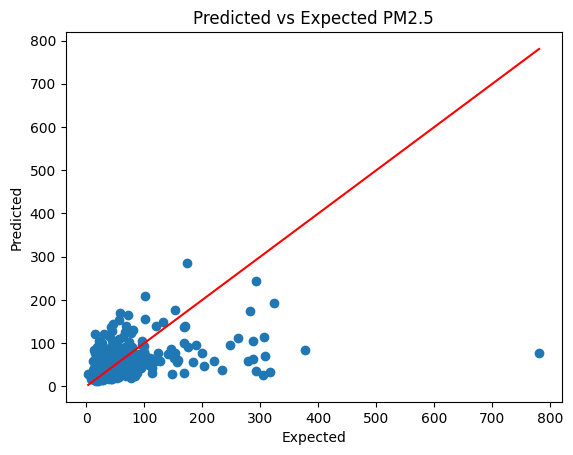

In [ ]:
plt.scatter(df['pm25'], preds)
plt.plot([df['pm25'].min(), df['pm25'].max()], [df['pm25'].min(), df['pm25'].max()], color='red')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Predicted vs Expected PM2.5')
plt.show()

In [33]:
print(f'R2: {r2_score(df["pm25"], preds)}')
print(f'RMSE: {root_mean_squared_error(df["pm25"], preds)}')

R2: 0.13317008117935447
RMSE: 52.32080141762255


In [34]:
preds = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    model = load_model()
    date = row['date'].strftime('%Y%m%d')
    lat, lon = find_closest_lat_lon(row['site_lat'], row['site_lon'])
    preds.append(predict_pm25_daily(model, date, [lat, lat], [lon, lon])[0, 3])

100%|██████████| 649/649 [00:54<00:00, 11.88it/s]


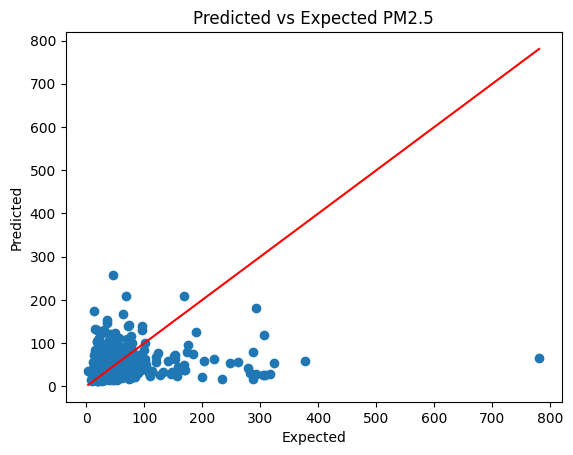

In [35]:
plt.scatter(df['pm25'], preds)
plt.plot([df['pm25'].min(), df['pm25'].max()], [df['pm25'].min(), df['pm25'].max()], color='red')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Predicted vs Expected PM2.5')
plt.show()

In [36]:
print(f'R2: {r2_score(df["pm25"], preds)}')
print(f'RMSE: {root_mean_squared_error(df["pm25"], preds)}')

R2: -0.10868965307678469
RMSE: 59.171480886718676
